In [1]:
#导入所需库
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm, datasets

In [2]:
#Iris有三种分类（0，1，2）和四类特征
iris = datasets.load_iris()
X = iris.data[:,:2] #我们这里只取前两类特征的观测值
y = iris.target #Iris的标签（类别）

In [3]:
print(X)

[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]
 [5.4 3.9]
 [4.6 3.4]
 [5.  3.4]
 [4.4 2.9]
 [4.9 3.1]
 [5.4 3.7]
 [4.8 3.4]
 [4.8 3. ]
 [4.3 3. ]
 [5.8 4. ]
 [5.7 4.4]
 [5.4 3.9]
 [5.1 3.5]
 [5.7 3.8]
 [5.1 3.8]
 [5.4 3.4]
 [5.1 3.7]
 [4.6 3.6]
 [5.1 3.3]
 [4.8 3.4]
 [5.  3. ]
 [5.  3.4]
 [5.2 3.5]
 [5.2 3.4]
 [4.7 3.2]
 [4.8 3.1]
 [5.4 3.4]
 [5.2 4.1]
 [5.5 4.2]
 [4.9 3.1]
 [5.  3.2]
 [5.5 3.5]
 [4.9 3.6]
 [4.4 3. ]
 [5.1 3.4]
 [5.  3.5]
 [4.5 2.3]
 [4.4 3.2]
 [5.  3.5]
 [5.1 3.8]
 [4.8 3. ]
 [5.1 3.8]
 [4.6 3.2]
 [5.3 3.7]
 [5.  3.3]
 [7.  3.2]
 [6.4 3.2]
 [6.9 3.1]
 [5.5 2.3]
 [6.5 2.8]
 [5.7 2.8]
 [6.3 3.3]
 [4.9 2.4]
 [6.6 2.9]
 [5.2 2.7]
 [5.  2. ]
 [5.9 3. ]
 [6.  2.2]
 [6.1 2.9]
 [5.6 2.9]
 [6.7 3.1]
 [5.6 3. ]
 [5.8 2.7]
 [6.2 2.2]
 [5.6 2.5]
 [5.9 3.2]
 [6.1 2.8]
 [6.3 2.5]
 [6.1 2.8]
 [6.4 2.9]
 [6.6 3. ]
 [6.8 2.8]
 [6.7 3. ]
 [6.  2.9]
 [5.7 2.6]
 [5.5 2.4]
 [5.5 2.4]
 [5.8 2.7]
 [6.  2.7]
 [5.4 3. ]
 [6.  3.4]
 [6.7 3.1]
 [6.3 2.3]
 [5.6 3. ]
 [5.5 2.5]
 [5.5 2.6]

In [4]:
print(X.shape)

(150, 2)


In [5]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [6]:
print(y.shape)

(150,)


In [7]:
svc = svm.SVC(kernel='linear', C=1.0)
svc.fit(X,y)
title = 'SVC with linear kernel'

In [8]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),np.arange(y_min, y_max, 0.02))

In [9]:
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])

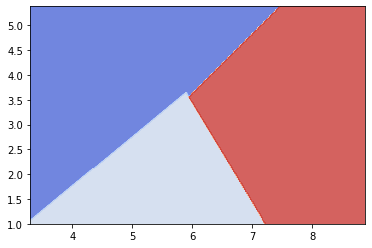

In [10]:
plt.plot()
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap = plt.cm.coolwarm, alpha = 0.8)

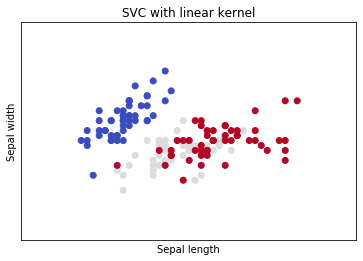

In [11]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title(title)

plt.show()

In [12]:
svc.predict(np.array([7.1,  3.0]).reshape(1,-1))

array([2])

In [13]:
total_predictions = 0
total_good_predictions = 0

Leava one out cross validation

In [14]:
for i in range(X.shape[0]-1):
    X_m_i = np.delete(X,i,axis=0)
    y_m_i = np.delete(y,i,axis=0)
    
    svc.fit(X_m_i, y_m_i)
    
    realLabel=y[i]
    
    tmp=svc.predict(X[i,:].reshape(1,-1))
    predictedLabel=tmp[0]
  
    print(y[i],svc.predict(X[i,:].reshape(1,-1)))
  
    total_predictions=total_predictions+1
    
    if realLabel == predictedLabel:
        total_good_predictions = total_good_predictions + 1
        
print('Total number of predictions: ' + str(total_predictions))
print('Total number of good predictions: ' + str(total_good_predictions))
print('Percentage accuracy: ' + str(100.*float(total_good_predictions)/float(total_predictions)))

0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [1]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
1 [2]
1 [2]
1 [2]
1 [1]
1 [2]
1 [1]
1 [2]
1 [1]
1 [2]
1 [1]
1 [1]
1 [1]
1 [1]
1 [1]
1 [1]
1 [2]
1 [1]
1 [1]
1 [1]
1 [1]
1 [1]
1 [1]
1 [1]
1 [1]
1 [2]
1 [2]
1 [2]
1 [2]
1 [1]
1 [1]
1 [1]
1 [1]
1 [1]
1 [1]
1 [1]
1 [1]
1 [2]
1 [1]
1 [1]
1 [1]
1 [1]
1 [1]
1 [1]
1 [1]
1 [1]
1 [1]
1 [1]
1 [1]
1 [1]
1 [1]
2 [2]
2 [1]
2 [2]
2 [1]
2 [2]
2 [2]
2 [1]
2 [2]
2 [2]
2 [2]
2 [2]
2 [1]
2 [2]
2 [1]
2 [1]
2 [2]
2 [2]
2 [2]
2 [2]
2 [1]
2 [2]
2 [1]
2 [2]
2 [1]
2 [2]
2 [2]
2 [1]
2 [1]
2 [2]
2 [2]
2 [2]
2 [2]
2 [2]
2 [1]
2 [1]
2 [2]
2 [2]
2 [2]
2 [1]
2 [2]
2 [2]
2 [2]
2 [1]
2 [2]
2 [2]
2 [2]
2 [1]
2 [2]
2 [2]
Total number of predictions: 149
Total number of good predictions: 120
Percentage accuracy: 80.53691275167

In [15]:
svc = svm.SVC(kernel='rbf', gamma=0.7, C=1.0)
svc.fit(X, y)
title = 'SVC with linear kernel'

In [16]:
for i in range(X.shape[0]-1):
    X_m_i = np.delete(X,i,axis=0)
    y_m_i = np.delete(y,i,axis=0)
    
    svc.fit(X_m_i, y_m_i)
    
    realLabel=y[i]
    
    tmp=svc.predict(X[i,:].reshape(1,-1))
    predictedLabel=tmp[0]
  
    print(y[i],svc.predict(X[i,:].reshape(1,-1)))
  
    total_predictions=total_predictions+1
    
    if realLabel == predictedLabel:
        total_good_predictions = total_good_predictions + 1
        
print('Total number of predictions: ' + str(total_predictions))
print('Total number of good predictions: ' + str(total_good_predictions))
print('Percentage accuracy: ' + str(100.*float(total_good_predictions)/float(total_predictions)))

0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [1]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
1 [2]
1 [2]
1 [2]
1 [1]
1 [2]
1 [1]
1 [2]
1 [1]
1 [2]
1 [1]
1 [1]
1 [1]
1 [1]
1 [1]
1 [1]
1 [2]
1 [1]
1 [1]
1 [1]
1 [1]
1 [1]
1 [1]
1 [2]
1 [1]
1 [2]
1 [2]
1 [2]
1 [2]
1 [1]
1 [1]
1 [1]
1 [1]
1 [1]
1 [1]
1 [1]
1 [2]
1 [2]
1 [2]
1 [1]
1 [1]
1 [1]
1 [1]
1 [1]
1 [1]
1 [1]
1 [1]
1 [1]
1 [2]
1 [1]
1 [1]
2 [2]
2 [1]
2 [2]
2 [2]
2 [2]
2 [2]
2 [1]
2 [2]
2 [2]
2 [2]
2 [2]
2 [2]
2 [2]
2 [1]
2 [1]
2 [2]
2 [2]
2 [2]
2 [2]
2 [1]
2 [2]
2 [1]
2 [2]
2 [1]
2 [2]
2 [2]
2 [1]
2 [1]
2 [2]
2 [2]
2 [2]
2 [2]
2 [2]
2 [2]
2 [1]
2 [2]
2 [2]
2 [2]
2 [1]
2 [2]
2 [2]
2 [2]
2 [1]
2 [2]
2 [2]
2 [2]
2 [1]
2 [2]
2 [2]
Total number of predictions: 298
Total number of good predictions: 239
Percentage accuracy: 80.20134228187

In [17]:
svc = svm.SVC(kernel='poly', degree=3, C=1.0)
svc.fit(X, y)
title = 'SVC with RBF kernel'

In [18]:
for i in range(X.shape[0]-1):
    X_m_i = np.delete(X,i,axis=0)
    y_m_i = np.delete(y,i,axis=0)
    
    svc.fit(X_m_i, y_m_i)
    
    realLabel=y[i]
    
    tmp=svc.predict(X[i,:].reshape(1,-1))
    predictedLabel=tmp[0]
  
    print(y[i],svc.predict(X[i,:].reshape(1,-1)))
  
    total_predictions=total_predictions+1
    
    if realLabel == predictedLabel:
        total_good_predictions = total_good_predictions + 1
        
print('Total number of predictions: ' + str(total_predictions))
print('Total number of good predictions: ' + str(total_good_predictions))
print('Percentage accuracy: ' + str(100.*float(total_good_predictions)/float(total_predictions)))

0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
1 [2]
1 [2]
1 [2]
1 [1]
1 [2]
1 [1]
1 [2]
1 [1]
1 [2]
1 [1]
1 [1]
1 [1]
1 [1]
1 [1]
1 [1]
1 [2]
1 [1]
1 [1]
1 [1]
1 [1]
1 [1]
1 [1]
1 [1]
1 [1]
1 [2]
1 [2]
1 [2]
1 [2]
1 [1]
1 [1]
1 [1]
1 [1]
1 [1]
1 [1]
1 [1]
1 [1]
1 [2]
1 [1]
1 [1]
1 [1]
1 [1]
1 [1]
1 [1]
1 [1]
1 [1]
1 [1]
1 [1]
1 [1]
1 [1]
1 [1]
2 [2]
2 [1]
2 [2]
2 [1]
2 [2]
2 [2]
2 [1]
2 [2]
2 [2]
2 [2]
2 [2]
2 [1]
2 [2]
2 [1]
2 [1]
2 [2]
2 [2]
2 [2]
2 [2]
2 [1]
2 [2]
2 [1]
2 [2]
2 [1]
2 [2]
2 [2]
2 [1]
2 [1]
2 [2]
2 [2]
2 [2]
2 [2]
2 [2]
2 [1]
2 [1]
2 [2]
2 [2]
2 [2]
2 [1]
2 [2]
2 [2]
2 [2]
2 [1]
2 [2]
2 [2]
2 [2]
2 [1]
2 [2]
2 [2]
Total number of predictions: 447
Total number of good predictions: 360
Percentage accuracy: 80.53691275167

In [19]:
svc = svm.LinearSVC(C=1.0)
svc.fit(X, y)
title = 'SVC with polynomial (degree 3) kernel'

/Users/yancy/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [20]:
for i in range(X.shape[0]-1):
    X_m_i = np.delete(X,i,axis=0)
    y_m_i = np.delete(y,i,axis=0)
    
    svc.fit(X_m_i, y_m_i)
    
    realLabel=y[i]
    
    tmp=svc.predict(X[i,:].reshape(1,-1))
    predictedLabel=tmp[0]
  
    print(y[i],svc.predict(X[i,:].reshape(1,-1)))
  
    total_predictions=total_predictions+1
    
    if realLabel == predictedLabel:
        total_good_predictions = total_good_predictions + 1
        
print('Total number of predictions: ' + str(total_predictions))
print('Total number of good predictions: ' + str(total_good_predictions))
print('Percentage accuracy: ' + str(100.*float(total_good_predictions)/float(total_predictions)))

0 [0]
0 [0]
0 [0]
0 [0]


/Users/yancy/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/yancy/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/yancy/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/yancy/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/yancy/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, i

0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]


/Users/yancy/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/yancy/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/yancy/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/yancy/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/yancy/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, i

0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [1]
0 [0]
0 [0]


/Users/yancy/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/yancy/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/yancy/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/yancy/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/yancy/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, i

0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
0 [0]
1 [2]
1 [2]
1 [2]
1 [1]
1 [2]
1 [1]
1 [2]
1 [1]
1 [2]
1 [1]
1 [1]
1 [2]
1 [1]
1 [2]


/Users/yancy/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/yancy/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/yancy/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/yancy/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/yancy/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, i

1 [1]
1 [2]
1 [1]
1 [1]
1 [1]
1 [1]
1 [2]
1 [2]
1 [1]
1 [2]
1 [2]
1 [2]
1 [2]
1 [2]
1 [2]
1 [1]
1 [1]
1 [1]
1 [1]
1 [1]
1 [0]
1 [0]


/Users/yancy/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/yancy/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/yancy/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/yancy/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/yancy/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, i

1 [2]
1 [1]
1 [1]
1 [1]
1 [1]
1 [2]
1 [1]
1 [1]
1 [1]
1 [1]
1 [1]
1 [2]
1 [1]
1 [1]
2 [2]
2 [1]
2 [2]
2 [2]
2 [2]
2 [2]
2 [1]
2 [2]


/Users/yancy/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/yancy/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/yancy/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/yancy/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/yancy/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, i

2 [2]
2 [2]
2 [2]
2 [2]
2 [2]
2 [1]
2 [1]
2 [2]
2 [2]
2 [2]
2 [2]
2 [1]
2 [2]
2 [1]
2 [2]
2 [2]
2 [2]
2 [2]
2 [2]
2 [2]
2 [2]


/Users/yancy/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/yancy/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/yancy/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/yancy/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/yancy/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, i

2 [2]
2 [2]
2 [2]
2 [2]
2 [2]
2 [1]
2 [2]
2 [2]
2 [2]
2 [2]
2 [2]
2 [2]
2 [2]
2 [1]
2 [2]
2 [2]
2 [2]
2 [1]
2 [2]
2 [2]
Total number of predictions: 596
Total number of good predictions: 477
Percentage accuracy: 80.03355704697987


/Users/yancy/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/yancy/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


5-folders Cross Validation